# Custom Datasets

## Install Libraries

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
from torch.utils.data import DataLoader, Dataset

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


## Reading Custom Data

In [3]:
landmarks_frame = pd.read_csv('../custom_data/faces/face_landmarks.csv')
landmarks_frame.shape

(69, 137)

In [4]:
n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks  = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks, dtype=float).reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


## Visualize Landmarks

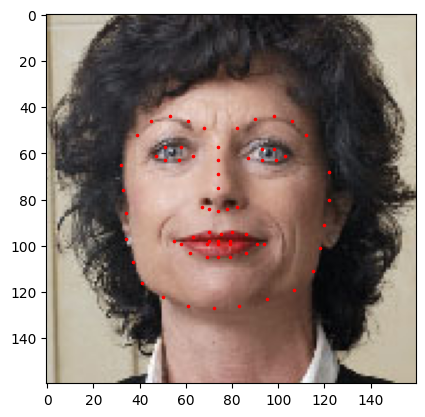

In [13]:
import os
from skimage import io, transform

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)

plt.figure()
show_landmarks(io.imread(os.path.join('../custom_data/faces/', img_name)), landmarks)
plt.show()

## Custom Dataset

In [14]:
class FaceLandmarksDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.landmarks_frame = pd.read_csv(f"{root_dir}{csv_file}")
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)

        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample


0 (324, 215, 3) (68, 2)


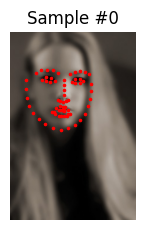

1 (500, 333, 3) (68, 2)


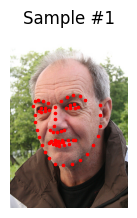

2 (250, 258, 3) (68, 2)


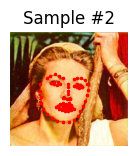

3 (434, 290, 3) (68, 2)


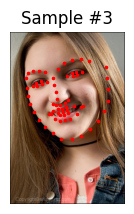

In [15]:
face_dataset = FaceLandmarksDataset(csv_file='face_landmarks.csv', root_dir='../custom_data/faces/')

fig = plt.figure()

for i, sample in enumerate(face_dataset):
    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break